<a href="https://colab.research.google.com/github/niyati295/Financial-Analysis-of-Datasets/blob/main/DecisionTreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#StockPricePrediction
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
ticker='AAPL'
data=yf.download(ticker,start='2020-01-01',end='2023-01-01')
print(data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.059441  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.349136  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.925629  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.582672  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.750237  132079200


In [4]:
data['Next_Close']=data['Close'].shift(-1)
data=data[:-1]
X=data[['Close']]
y=data['Next_Close']

print(X.head())
print(y.head())



                Close
Date                 
2020-01-02  75.087502
2020-01-03  74.357498
2020-01-06  74.949997
2020-01-07  74.597504
2020-01-08  75.797501
Date
2020-01-02    74.357498
2020-01-03    74.949997
2020-01-06    74.597504
2020-01-07    75.797501
2020-01-08    77.407501
Name: Next_Close, dtype: float64


In [7]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 604 samples
Testing set size: 151 samples


In [10]:
# Initialize the regressor
regressor = DecisionTreeRegressor(random_state=42)

# Train the regressor
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [11]:
y_pred=regressor.predict(X_test)

In [12]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared:{r2:.2f}')


Mean Squared Error: 13.96
R-squared:0.99


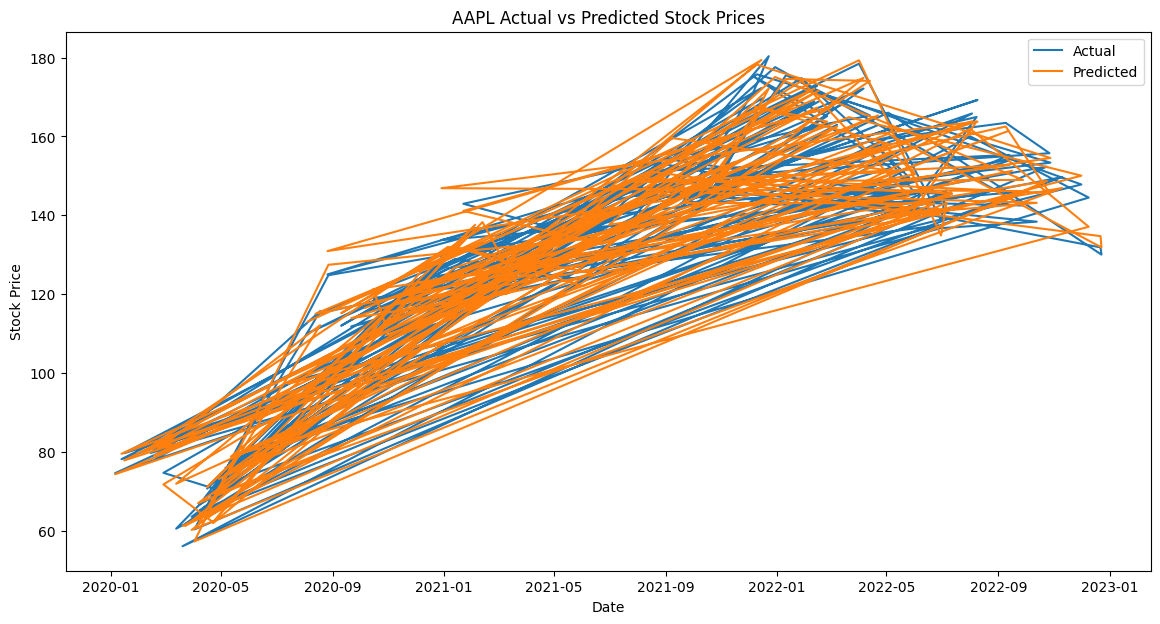

In [15]:
plt.figure(figsize=(14,7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{ticker} Actual vs Predicted Stock Prices')
plt.legend()
plt.show()